<h1>Titanic Data Analysis</h1>

In this notebook we will explore the titanic data set and try to see if there are characteristics that allowed a passenger to have a higher rate of survival.

In [2]:
#importing dependencies
import csv
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandasql import sqldf


def pysqldf(q):
    return sqldf(q, globals())


data = pd.read_csv('titanic-data.csv')



<h3> Basic Exploration</h3>

In [3]:
#Exploring the first ten rows of each column
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#Looking at the NA values of each colunn
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
#Overview of Age column 
data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

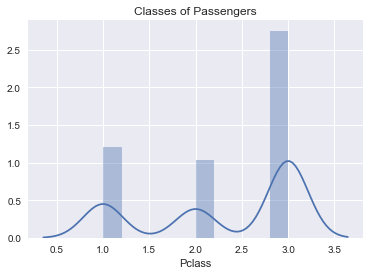

In [6]:
x = data['Pclass']
sns.distplot(x).set_title("Classes of Passengers");

Here is a basic plot of the different classes. This graph clearly shows class three has significantly more passengers. 

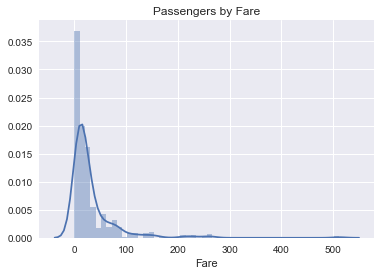

In [8]:
x2 = data['Fare']
sns.distplot(x2).set_title("Passengers by Fare");

Here is the basic distribution of of fares. As you can see the vast majority of passengers paid between 1 and 100 dollars for their fare

In [7]:
#Overview of Fare column
data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<h3>Basic Analysis:</h3><hr>
177 missing values for Age.<br>
Only 204 values non-null for Cabin.<br>
Maybe Leave Cabin column out of data analysis.<br>
Use average to fill in missing ages or look at title in name and give average based on title.<br>
The 2 missing values for embarked are negligible.<br>
The average passenger was around 30 years old.<br>
75% of the passengers were age 38 or below.<br>
The average fare was 32 dollars. <br>



In [8]:
#Counting the number of survivors
survived = 0
total_passengers = 891

for i in data['Survived']:
    if i == 1:
        survived += 1

survival_rate = survived/total_passengers
print(survival_rate)
print(survived)

0.3838383838383838
342


In [9]:
#Counting passengers in each class
pclass_1 = 0
pclass_2 = 0
pclass_3 = 0


for i in data["Pclass"]:
    if i == 1:
        pclass_1 += 1
    elif i == 2:
        pclass_2 += 1
    else:
        pclass_3 += 1

print(pclass_1)
print(pclass_2)
print(pclass_3)

216
184
491


In [10]:
#Seperating females based on whether they are a minor
females = 0
minors = 0


for i in data['Sex']:
    if i == "female":
        females += 1

for i in data["Age"]:
    if i <= 18:
        minors += 1


print(females)
print(minors)

314
139


In [11]:
#Counting the number of passengers that embarked from each port
embarked_C = 0
embarked_Q = 0
embarked_S = 0

for i in data["Embarked"]:
    if i == "C":
        embarked_C += 1

for i in data["Embarked"]:
    if i == "Q":
        embarked_Q += 1

for i in data["Embarked"]:
    if i == "S":
        embarked_S += 1

print(embarked_C)
print(embarked_Q)
print(embarked_S)

168
77
644


<h4>Basic Findings:</h4><hr>

We see that 35% of the passengers are females.<br>
There are also only 139 minors.<br>
There were more 1st class seats than 2nd class seats which was unexpected.
We see that the overall survival rate is only 38%. This may have something to do with the famous scene at the end of the movie where there are not enough lifeboats for the passengers on board. 


<h3> Deeper Analysis:</h3>

In [12]:
#Here we are counting the survival rate of passengers based on gender and whether they were a minor or not
MinorMales = data[(data['Age'] <= 18) & (data['Sex']=='male') ].count()['PassengerId']
MinorFemales = data[(data['Age'] <= 18) & (data['Sex']=='female') ].count()['PassengerId']
AdultMales = data[(data['Age'] > 18) & (data['Sex']=='male') ].count()['PassengerId']
AdultFemales = data[(data['Age'] > 18) & (data['Sex']=='female') ].count()['PassengerId']

MinorMalesSurvived = data[(data['Age'] <=18) & (data['Sex']=='male') & (data["Survived"]==1) ].count()['PassengerId']
MinorFemalesSurvived = data[(data['Age'] <=18) & (data['Sex']=='female') & (data["Survived"]==1) ].count()['PassengerId']
AdultMalesSurvived = data[(data['Age'] > 18) & (data['Sex']=='male') & (data["Survived"]==1) ].count()['PassengerId']
AdultFemalesSurvived = data[(data['Age'] > 18) & (data['Sex']=='female') & (data["Survived"]==1) ].count()['PassengerId']

survival_rate_minor_males = MinorMalesSurvived/MinorMales
survival_rate_minor_females = MinorFemalesSurvived/MinorFemales
survival_rate_adult_males = AdultMalesSurvived/AdultMales
survival_rate_adult_females = AdultFemalesSurvived/AdultFemales


In [13]:
#Number of females and males based on whether they are minors or not.
print(MinorMales)
print(MinorFemales)
print(AdultMales)
print(AdultFemales)

71
68
382
193


In [14]:
#Number of survivors of the minor and adult male and female groups
print(MinorMalesSurvived)
print(MinorFemalesSurvived)
print(AdultMalesSurvived)
print(AdultFemalesSurvived)

24
46
69
151


In [15]:
#Survival rate derivied from the previous two cells output
print(survival_rate_minor_males)
print(survival_rate_minor_females)
print(survival_rate_adult_males)
print(survival_rate_adult_females)

0.338028169014
0.676470588235
0.180628272251
0.782383419689


In [17]:
# Here we are seeing if a high fare affected survival rates
HighFare = data[(data['Fare'] < 32) & (data['Survived']==1) ].count()['PassengerId']
LowFare = data[(data['Fare'] > 32) & (data['Survived']==1) ].count()['PassengerId']


In [18]:
#Number of passengers with a high and low fare
print(HighFare)
print(LowFare)

216
126


In [19]:
#Here we are checking if having a family member lead to a higher survival rate
data['Family'] = data['SibSp'] + data['Parch']

passengers_with_family = data[data['Family'] > 0].count()['PassengerId']
passengers_with_family_survived = data[(data['Family'] > 0)  & (data['Survived']==1)].count()['PassengerId']

passengers_with_family_survival_rate = passengers_with_family_survived/passengers_with_family


In [20]:
#Number of each group and corresponding survival rate in the next cell. 
print(passengers_with_family)
print(passengers_with_family_survived)

354
179


In [21]:
print(passengers_with_family_survival_rate)

0.505649717514


In [22]:
#Here we are looking at survival rate based on class
pclass1_survived = data[(data['Pclass']==1)  & (data['Survived']==1)].count()['PassengerId']
pclass2_survived = data[(data['Pclass']==2)  & (data['Survived']==1)].count()['PassengerId']
pclass3_survived = data[(data['Pclass']==3)  & (data['Survived']==1)].count()['PassengerId']

pclass1_survival_rate = pclass1_survived/pclass_1
pclass2_survival_rate = pclass2_survived/pclass_2
pclass3_survival_rate = pclass3_survived/pclass_3


In [23]:
#Number of passengers in each class who survived
print(pclass1_survived)
print(pclass2_survived)
print(pclass3_survived)

136
87
119


In [24]:
#Survival rate based on class
print(pclass1_survival_rate)
print(pclass2_survival_rate)
print(pclass3_survival_rate)


0.62962962963
0.472826086957
0.242362525458


In [25]:
#Comparing survival rates based on the embarked port
embarked_C_survived = data[(data['Embarked']=='C')  & (data['Survived']==1)].count()['PassengerId']
embarked_Q_survived = data[(data['Embarked']=='Q')  & (data['Survived']==1)].count()['PassengerId']
embarked_S_survived = data[(data['Embarked']=='S')  & (data['Survived']==1)].count()['PassengerId']

embarked_C_survival_rate = embarked_C_survived/embarked_C
embarked_Q_survival_rate = embarked_Q_survived/embarked_Q
embarked_S_survival_rate = embarked_S_survived/embarked_S


In [26]:
#Number of passengers who embarked from each port who survived
print(embarked_C_survived)
print(embarked_Q_survived)
print(embarked_S_survived)

93
30
217


In [27]:
#Survival rate based on previous cells output
print(embarked_C_survival_rate)
print(embarked_Q_survival_rate)
print(embarked_S_survival_rate)

0.553571428571
0.38961038961
0.336956521739


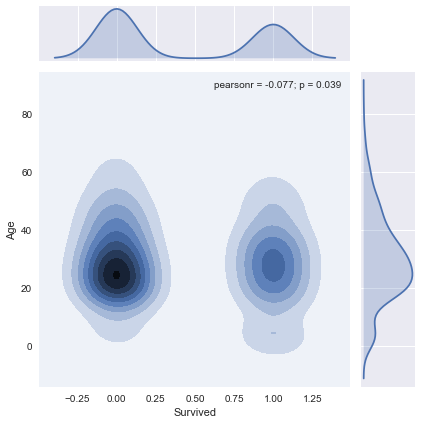

In [10]:
#Kernal density plot of survival and age
sns.jointplot(x="Survived", y="Age", data=data, kind='kde');

This plot is a good illustration of people's surivival and age. You can clearly see that people who didnt survive tended to be older than 20 and younger than 40. 


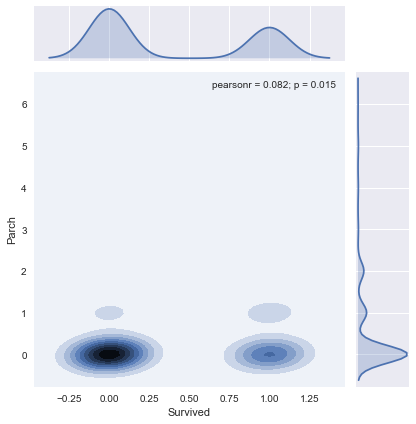

In [166]:
#Kernal density plot of survival and parch
sns.jointplot(x="Survived", y="Parch", data=data, kind="kde");

A little more difficult to see but there is a large density of people with 0 family members who didn't survive. 

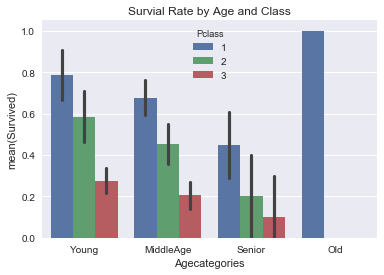

In [11]:
#Bar plot of Survival rate based on age groups and ticket class
bins = [0, 25, 50, 75, 100]
labels = ["Young", "MiddleAge", "Senior", "Old"]

data['Agecategories'] = pd.cut(data['Age'], bins=bins, labels=labels)

sns.barplot(x="Agecategories", y='Survived', hue="Pclass", data=data).set_title("Survial Rate by Age and Class");

This bar plot gives us a good snapshot of people's age, class and surivial mean. We can see 3rd Class senior's had the lowest survival rate, while Old first class(the only class) passengers had the highest. 

<h4>Limitations</h4>

There are a few limitations of the project. The first is that it is difficult to say that there were any casual relationships. Females had a significantly higher survival rate, but we cant say being female caused a higher survival rate. Also this is a very specific circumstance that can never be replicated. Maybe there were other pieces of data that were not recorded. There could be a another piece of data that better explains why females had a higher survival rate. Since this happened a relatively long time ago, we just cant be sure. It is diffciult to generalize from data of a historical event. So I would say doing analysis on only single historical event is the biggest problem I faced during this project for all the reasons I outlined above. Other than that, this dataset was relatively easy to work with. The data was fairly clean and the analysis was straight forward. For the analysis I simply tried to tie everything back to survival rate and I eventually got the conclusion I was looking for by getting more and more specific about which features were associated with someone who survived. The data was also small enough that I could open it in excel and manually explore it as well. It is an order of magnitude easier than doing data wrangling. 

<h3>Final Analysis</h3><hr>

Out of the almost 400 adult male passengers, only 69 survived. <br>
Adult females had a very high survival rate. Out of the 193 adult females, 151 of them survived.<br>
Minor females had a slighty lower survival rate than their adult counter parts, but it was still relatively high.<br>
Minor males had almost twice the survival rate of their adult counter parts.<br>

We can't say that being female caused a passenger to have a higher survival rate. There may have been correlation such as females being allowed on lifeboats before males. <br>
Minor males may have had a higher survival rate by being allowed to get on life boats with their mothers. <br>
<br>

Interesting to note that people with high fares had a better survival rate. This could be purely coincidental though.<br>
<br>

Having a family gave someone a slightly higher chance at survival (15%). It might be because the family didn't want to be split up, which might have increased their chance of getting a life boat. <br>

1st class passengers had twice the overall survival rate. Maybe they had better access to lifeboats. 3rd class tickets had a below average survival rate. <br>

Embarking from port C gave the highest rate of survival. It is difficult to conclude how this may have allowed the passenger to survive better.<br>

<h4>Conclusion</h4>

Combining everything we have learned so far, we can answer our original question. Our passenger with the highest survival chance will be an adult female with a first class ticket that emabarked from port C. Testing our hypothesis, we discover that this is indeed true! This demographic had a 97% chance of survival, which is almost 3 times the average surivial rate. This group also  only had 1 casualty.


In [28]:
#Highest chance of survival
final_survived = data[(data['Embarked']=='C')  & (data['Pclass']==1) & (data['Age'] > 18) &  (data['Sex']=='female') & (data['Survived']==1)].count()['PassengerId']
final_total = data[(data['Embarked']=='C')  & (data['Pclass']==1) & (data['Age'] > 18) &  (data['Sex']=='female') ].count()['PassengerId']
final_survival_rate = final_survived/final_total
print(final_survived)
print(final_total)
print(final_survival_rate)

33
34
0.970588235294


<h3>Resources:<h3>

https://www.kaggle.com/headsortails/pytanic/notebook

https://discussions.udacity.com/t/how-to-compare-columns/250214

https://discussions.udacity.com/t/how-to-add-two-data-frames/250223
